# Imports

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Logistic map

See https://en.wikipedia.org/wiki/Logistic_map.
The ultimate goal of this section is to plot its bifurcation diagram (https://en.wikipedia.org/wiki/Bifurcation_diagram).
We will approach it by steps, studying various properties of the map. This will give us the chance to review most of the topics introduced in the first few lectures.

Let's start by defining a function that, given the population ratio xn at step n, returns the population ratio at n+1 (I'll use step and generation interchangeably)

In [2]:
def logistic(xn, r):
    return r*xn*(1-xn)

We can iterate it a few time and plot the population ratio as a function of the generation, for certain initial condition and reproduction rate

In [5]:
r = 2.3
x0 = .5

steps = [x for x in range(1, 101)]
population_ratio = []


xn_m1 = x0
for x in steps:
    xn = logistic(xn_m1, r)
    xn_m1 = xn
    population_ratio.append(xn)

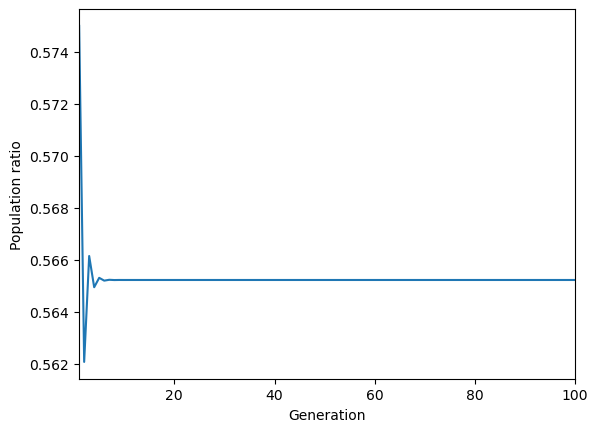

In [6]:
plt.plot(steps, population_ratio)

plt.xlim(steps[0], steps[-1])
plt.ylabel("Population ratio")
plt.xlabel("Generation")

plt.show()

We that after a few generation the system reches an equilibrium. We may want to check if there is any dependence on the initial conditions. To do so we'll need to evolve the system multiple times. Thus, it's convenient to write a different fuction which does that. One possibility is to use a generator.

In [7]:
def logistic_generator(xn, r, total_iterations):    
    for i in range(total_iterations):
        xn_p_1 = logistic(xn, r)
        yield xn_p_1
        xn = xn_p_1

In [8]:
[x for x in logistic_generator(0.4, 2., 10)]

[0.48, 0.4992, 0.49999872, 0.4999999999967232, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

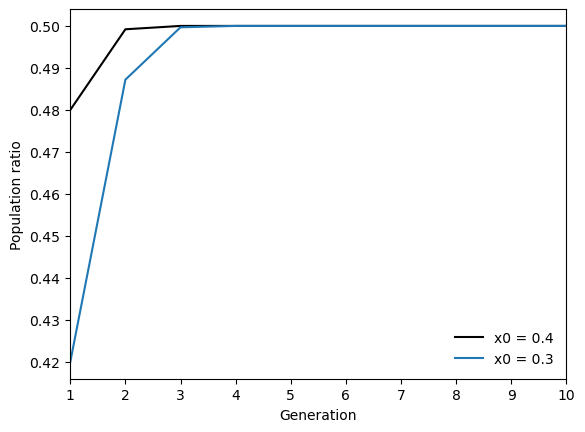

In [9]:
num_steps = 10

steps = np.linspace(1, num_steps, num_steps)

plt.plot(steps, [x for x in logistic_generator(0.4, 2., num_steps)], label="x0 = 0.4", c="k")
plt.plot(steps, [x for x in logistic_generator(0.3, 2., num_steps)], label="x0 = 0.3")

plt.legend(frameon=False)

plt.xlim(steps[0], steps[-1])
plt.ylabel("Population ratio")
plt.xlabel("Generation")

plt.show()

Adding new lines to plot by hand is time consuming (and prone to error! For example you might forget to update the label). We can use a for loop instead

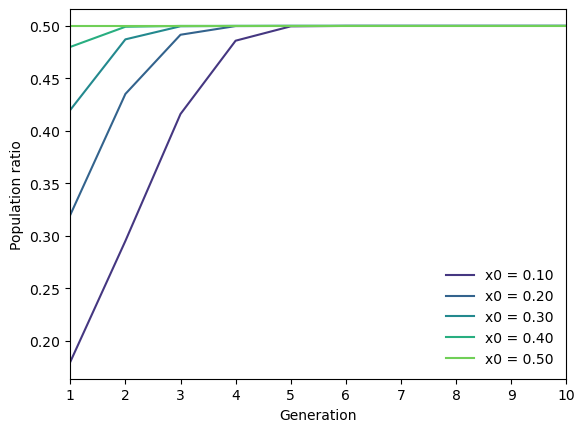

In [10]:
num_steps = 10

steps = np.linspace(1, num_steps, num_steps)

for x0 in np.linspace(.1, .5, 5):
    plt.plot(steps, [x for x in logistic_generator(x0, 2., num_steps)], label="x0 = %.2f"%x0, c=plt.cm.viridis(int(x0*400)))

plt.legend(frameon=False)
plt.xlim(steps[0], steps[-1])
plt.ylabel("Population ratio")
plt.xlabel("Generation")

plt.show()

We empirically convinced ourselves that even after a few generations there is little to no memory of the initial conditions. Therefore, it might be more interesting to study the dependence on the rate r

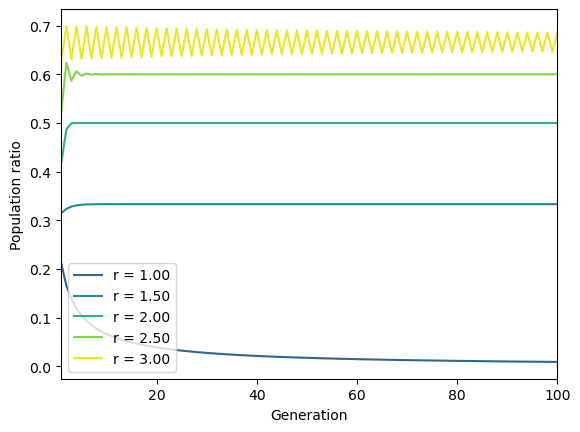

In [11]:
num_steps = 100

steps = np.linspace(1, num_steps, num_steps)

for r in np.linspace(1, 3, 5):
    plt.plot(steps, [x for x in logistic_generator(0.3, r, num_steps)], label="r = %.2f"%r, c=plt.cm.viridis(int(r*250/3)))

plt.legend(frameon=True)
plt.xlim(steps[0], steps[-1])
plt.ylabel("Population ratio")
plt.xlabel("Generation")

plt.show()

We start seeing something "weird". For r<=1 the population dies off. For larger values of r it stabilize to a single >0 value. However, for some value 2.5 < r < 3.0 the sistem oscillates between two equilibrium states.
We want to look at this more in detail. Since a single plot would become very busy very fast, let's define a function that quickly create a single plot with all the required bells and whistles

In [12]:
def plot_iterations(xs, ys, r):
    plt.plot(xs, ys, label="r = %.2f"%r)

    plt.legend(frameon=True)
    plt.xlim(steps[0], steps[-1])
    plt.ylabel("Population ratio")
    plt.xlabel("Generation")

    plt.show()

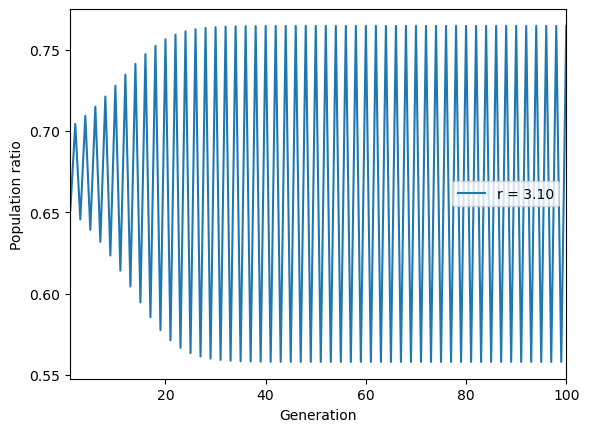

In [13]:
num_steps = 100
r = 3.1

steps = np.linspace(1, num_steps, num_steps)
generations = [x for x in logistic_generator(0.3, r, num_steps)]

plot_iterations(steps, generations, r)

Indeed an even smarter thing to do is to create a function that both evolves the system and creates the plot

In [16]:
def calculate_and_plot_iterations(num_steps, r):
    steps = np.linspace(1, num_steps, num_steps)
    generations = [x for x in logistic_generator(0.3, r, num_steps)]
    plot_iterations(steps, generations, r)

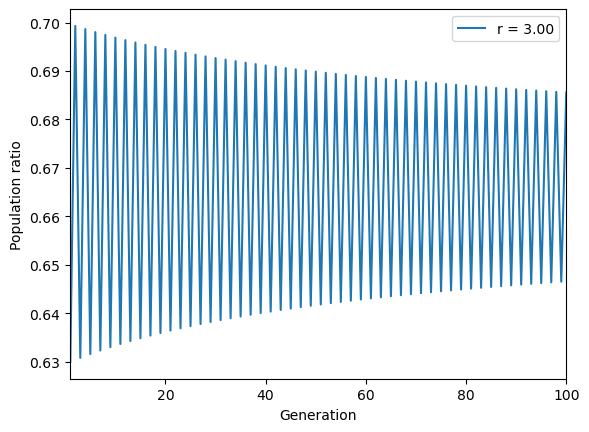

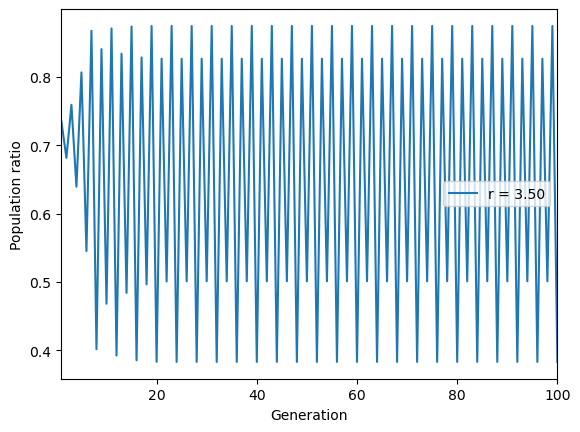

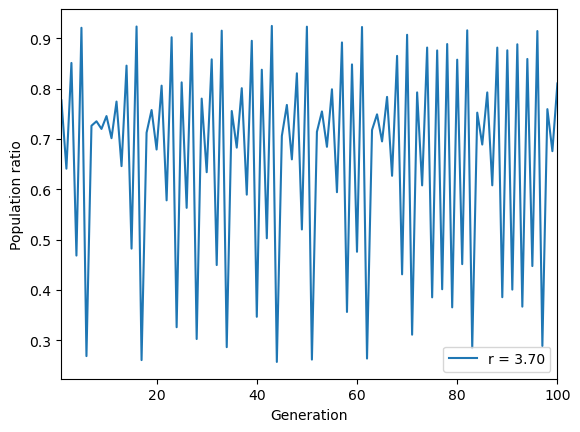

In [17]:
calculate_and_plot_iterations(num_steps=100, r=3)
calculate_and_plot_iterations(num_steps=100, r=3.5)
calculate_and_plot_iterations(num_steps=100, r=3.7)

(100 iterations are not quite enough for the system to stabilize, this can be fixed looking at more iterations, you can adjust things yourself)
For even higher values or r the system cicles among a few different values over 2, 4, ... generations.
What we want to do now is to disregard the part during which the system is relaxing to the "equilibrium cycle", and plot the collection of points in the cycle as a function of r. We can create a different generator that allow you to evolve the sistem for a certain number of generations, and then only gather the data about the last few ones.

In [20]:
def equilibrium_points_generator(r, total_iterations, num_returned_points):
    xn = 0.3
    
    for i in range(total_iterations - num_returned_points):
        xn_p_1 = logistic(xn, r)
        xn = xn_p_1
        
    for i in range(max(0, total_iterations - num_returned_points), total_iterations): # max to avoid edge cases in which total_iterations < num_returned_points
        xn_p_1 = logistic(xn, r)
        yield xn_p_1
        xn = xn_p_1

In [22]:
[x for x in equilibrium_points_generator(2.4, 11, 3)]

[0.5833043449979505, 0.5833449266507098, 0.5833286956838107]

Plot bifurcation diagram

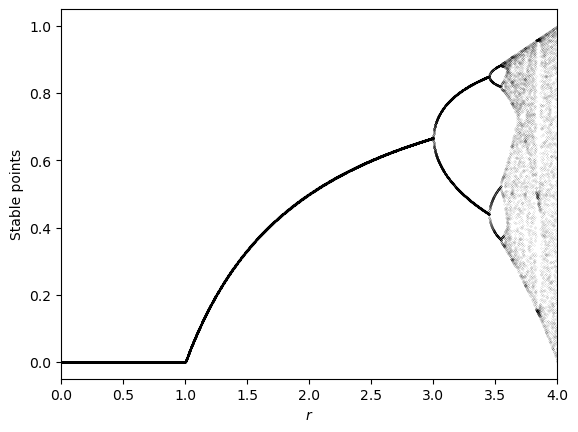

In [23]:
rmin = 0.
rmax = 4.

rs = np.linspace(rmin, rmax, 5000)

ys =[x for x in equilibrium_points_generator(rs, 1000, 10)]

for y in ys:
    plt.plot(rs, y, c="k", lw=0, marker=".", markersize=.1)

plt.xlim(rmin, rmax)
plt.xlabel("$r$")
plt.ylabel("Stable points")
    
plt.show()

# Mandelbrot set

The Mandelbrot set is the set of points c in the complex plane for which the function defined below does not diverge to infinity when iterated infinite times.
We want to review 2d plots showing the set.

In [24]:
def z_n(n, c):
    if(n == 0):
        return 0
    else:
        z_n_m1 = z_n(n-1, c)
        return z_n_m1**2 + c 

In [25]:
z_n(10, -1)

0

Of course we cannot iterate "infinite times" on a computer, so we will just iterate the function some (big) number of times. In practice we do not even need to iterate that many time to get a good approximation

In [27]:
z_n(10, 1)

3791862310265926082868235028027893277370233152247388584761734150717768254410341175325352026

We create a 2D mesh with the real and imaginary components of c to create the plot

In [28]:
xs = np.linspace(-2.25, .75, 1000)
ys = np.linspace(-1.5, 1.5, 1000)

xs, ys = np.meshgrid(xs, ys)

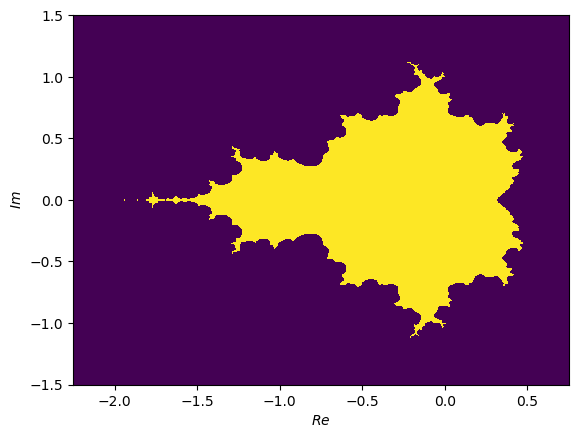

In [29]:
plt.pcolormesh(xs, ys, abs(z_n(10, xs + 1j*ys))<2) # 2 is arbitrarily select as the discriminant between points that converge and that diverge.
                                                   # you can check what happens iterating a different amout of times and modifying the threshold

plt.xlabel("$Re$")
plt.ylabel("$Im$")

plt.show()

# Julia set

We will now review multi-panel plots showing the Julia set. It is closely related to the Mandelbrot set but in this case c is a parameter (which we will vary) and the points in the set are the z0 in the complex plane for which the equation below does not diverge to infinity when iterated infinite times.

In [30]:
def z_n(n, z0, c=.5):
    if(n == 0):
        return z0
    else:
        z_n_m1 = z_n(n-1, z0, c)
        return z_n_m1**2 + c 

In [31]:
xs = np.linspace(-1.5, 1.5, 1000)
ys = np.linspace(-1.5, 1.5, 1000)

xs, ys = np.meshgrid(xs, ys)

/tmp/ipykernel_516/2401002191.py:6: RuntimeWarning: overflow encountered in square
  return z_n_m1**2 + c
/tmp/ipykernel_516/2401002191.py:6: RuntimeWarning: invalid value encountered in square
  return z_n_m1**2 + c
/tmp/ipykernel_516/3524768012.py:3: RuntimeWarning: overflow encountered in absolute
  plt.pcolormesh(xs, ys, abs(z_n(10, xs + 1j*ys, cherry_picked_c))<2)


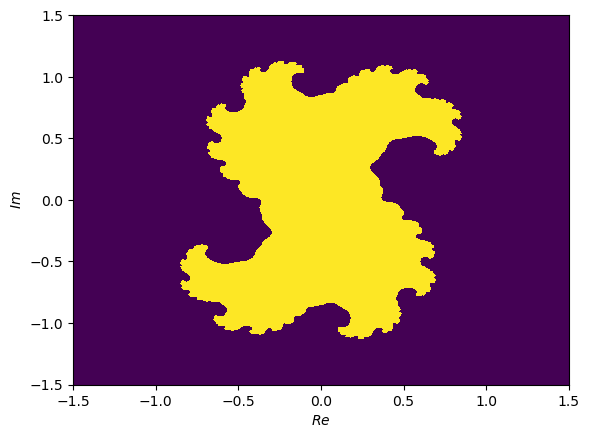

In [34]:
cherry_picked_c = .37-.15*1j

plt.pcolormesh(xs, ys, abs(z_n(10, xs + 1j*ys, cherry_picked_c))<2)

plt.xlabel("$Re$")
plt.ylabel("$Im$")

plt.show() # The function will incounter some errors due to the very big (and small) numbers involved.
           # This is an example of the numerical stability issues that were covered during the lecture.
           # In principle, one could/should check for extreme values and cut the evaluation short.

/tmp/ipykernel_516/2401002191.py:6: RuntimeWarning: overflow encountered in square
  return z_n_m1**2 + c
/tmp/ipykernel_516/2401002191.py:6: RuntimeWarning: invalid value encountered in square
  return z_n_m1**2 + c
/tmp/ipykernel_516/3793522824.py:5: RuntimeWarning: overflow encountered in absolute
  axs[i,j].pcolormesh(xs, ys, abs(z_n(10, xs + 1j*ys, (i-1)*0.5 -(j-1)*0.5*1j))<2)


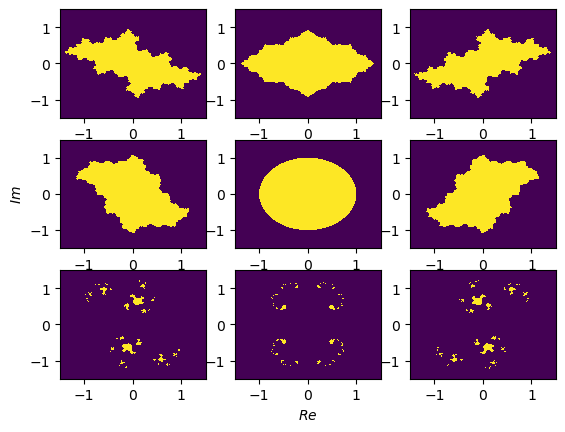

In [35]:
fig, axs = plt.subplots(3,3)

for i in range(3):
    for j in range(3):
        axs[i,j].pcolormesh(xs, ys, abs(z_n(10, xs + 1j*ys, (i-1)*0.5 -(j-1)*0.5*1j))<2)

axs[2,1].set_xlabel("$Re$")
axs[1,0].set_ylabel("$Im$")

plt.show()